<a href="https://colab.research.google.com/github/Gamearonx/Python-Basic/blob/main/NUMPY%2C_PANDAS%2C_MATPLOTLIB%2C_AND_SEABORN_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [11]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv("/content/drive/My Drive/PRE BOOT CAMP ASSIGNMENT/train.csv")

# 1. Inspecting Dataset

In [14]:
# Inspect the dataset
print("Dataset Info:")
df.info()

print("\nFirst 5 Rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

# 2. Numpy Operation

In [15]:
# Create arrays
array_1d = np.array([1, 2, 3, 4, 5])
array_zeros = np.zeros((3, 3))
array_ones = np.ones((2, 2))
array_random = np.random.rand(3, 3)

# Perform element-wise operations
array_sum = array_1d + 10
array_square = np.square(array_1d)

# Reshape and concatenate arrays
array_reshaped = array_1d.reshape((5, 1))
array_hstack = np.hstack((array_reshaped, array_reshaped))
array_vstack = np.vstack((array_reshaped, array_reshaped))

# 2. DF Manipulation

In [18]:
# Selecting specific columns
df_selected = df.iloc[:, :3]  # Selecting first 3 columns
print("\nSelected Columns:")
print(df_selected.head())

# Filtering rows where first column value > mean
filtered_df = df[df.iloc[:, 0] > df.iloc[:, 0].mean()]
print("\nFiltered DataFrame:")
print(filtered_df.head())

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.dropna(inplace=True)


Selected Columns:
   PassengerId  Survived  Pclass
0            1         0       3
1            2         1       1
2            3         1       3
3            4         1       1
4            5         0       3

Filtered DataFrame:
     PassengerId  Survived  Pclass                               Name     Sex  \
446          447         1       2  Mellinger, Miss. Madeleine Violet  female   
447          448         1       1        Seward, Mr. Frederic Kimber    male   
448          449         1       3     Baclini, Miss. Marie Catherine  female   
449          450         1       1     Peuchen, Major. Arthur Godfrey    male   
450          451         0       2              West, Mr. Edwy Arthur    male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
446  13.0      0      1      250644  19.5000   NaN        S  
447  34.0      0      0      113794  26.5500   NaN        S  
448   5.0      2      1        2666  19.2583   NaN        C  
449  52.0      0      0    

# 3. Data Preprocessing & Transformation

In [19]:
# Normalize numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[f"normalized_{col}"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Apply log transformation
for col in numeric_cols:
    df[f"log_{col}"] = np.log1p(df[col])

# Convert categorical variables to numerical format
df = pd.get_dummies(df, drop_first=True)

# 4: Data Visualization

In [20]:
# Function to Plot Survival Rate by Gender
def plot_survival_rate(df):
    if 'Sex' in df.columns and 'Survived' in df.columns:
        plt.figure(figsize=(6, 4))
        sns.barplot(x=df['Sex'], y=df['Survived'], estimator=np.mean, ci=None, palette='coolwarm')
        plt.xlabel("Gender")
        plt.ylabel("Survival Rate")
        plt.title("Survival Rate by Gender")
        plt.show()
    else:
        print("Required columns not found in dataset. Available columns:", df.columns.tolist())


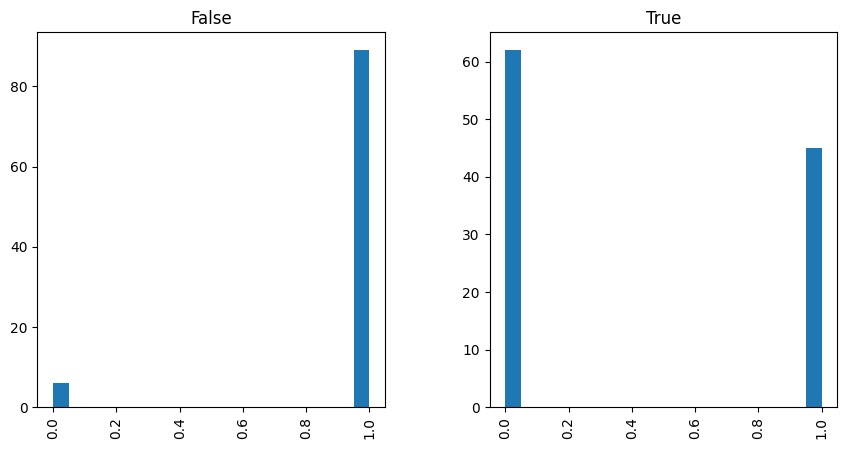

In [21]:
# Histogram
df['Survived'].hist(by=df['Sex_male'], bins=20, figsize=(10, 5))
plt.show()

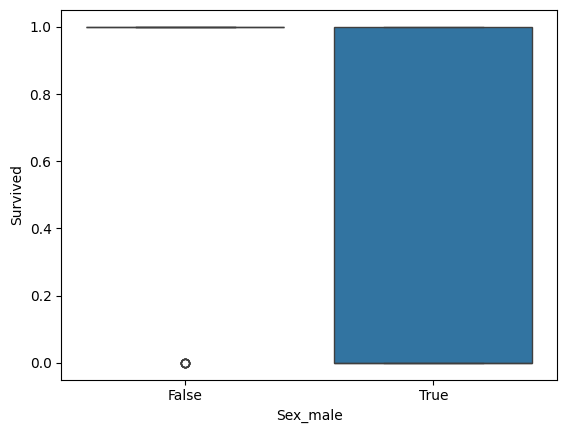

In [22]:
# Boxplot
sns.boxplot(x='Sex_male', y='Survived', data=df)
plt.show()

# 5: Fine-tuning and Optimization

In [23]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].astype('float32')

print("\nFinal DataFrame Info:")
df.info()


Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Columns: 510 entries, PassengerId to Embarked_S
dtypes: bool(489), float32(21)
memory usage: 114.6 KB
